In [3]:
# POPULATION ANALYSIS - NAIVE population analysis, regulation!

# import list
%reload_ext autoreload
%autoreload 2

import os
import numpy as np
import pandas as pd
import main_funcs as mfun
import utils_funcs as utils
import plot_funcs as pfun
import matplotlib.pyplot as plt
import pickle
from scipy import stats
from itertools import compress
import seaborn as sns
from sklearn import preprocessing
import matplotlib.gridspec as gridspec
import matplotlib as mpl
import warnings
from scipy.cluster.hierarchy import linkage, leaves_list
from sklearn.decomposition import PCA

warnings.filterwarnings("ignore", category=RuntimeWarning) 
warnings.filterwarnings("ignore", category= FutureWarning) 
warnings.filterwarnings("ignore", category= DeprecationWarning)
warnings.filterwarnings("ignore", category= UserWarning)


#paths
savefigpath  =  r'G:\My Drive\Manuscripts\0 CLAStPFC\panels_raw2'
#'C:\\Users\\Huriye\\Documents\\code\\clapfcstimulation\\figs\\'
analysispath = 'C:\\Users\\Huriye\\Documents\\code\\clapfcstimulation\\analysis\\'



Pearson correlation coefficient for Visual and Visual + Opto is -0.8756500610502436 and p: 0.0 
Pearson correlation coefficient for Visual and Visual + Opto is -0.7349772724505239 and p: 0.0 
Pearson correlation coefficient for Visual and Visual + Opto is -0.8512722210906964 and p: 0.0 
$\Delta$ Absolute magnitude - Total animal number for 13
[6.809672811495538e-09, 1.3541740813749386e-09]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


$\Delta$ CV - Total animal number for 13
[0.008311293634336959, 0.0006723947446657516]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



Correlation matrix for the Chrimson Naive population is calculating


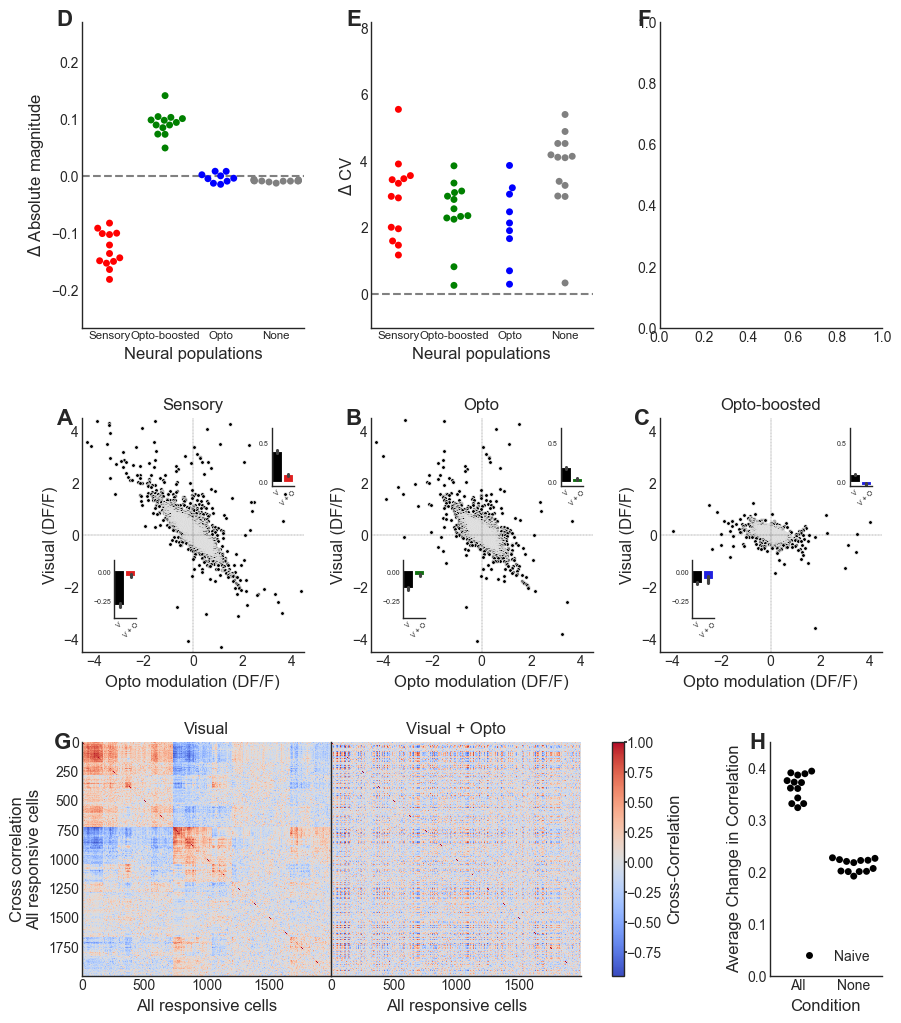

In [ ]:
# Figure 3: Chrimson mice - Naive network base analysis

interestedCohort = 'Chrimson'
interestedTrainedLevel = 'Naive'

pfun.set_figure()
fig = plt.figure(constrained_layout=False, figsize=(16, 18)) # 8,11 for full A4 page

# set gridspec
gs_Summary          = fig.add_gridspec(ncols=3, nrows=1, bottom=0.41, top=0.58, left=0.05, right=0.55,
                              wspace=0.3, hspace=0.1)
gs_scatterPlots     = fig.add_gridspec(ncols=3, nrows=1, bottom=0.23, top=0.36, left=0.05, right=0.55, 
                              wspace=0.3, hspace=0.1)

gs_correlation      = fig.add_gridspec(ncols=2, nrows=1, bottom=0.05, top=0.18, left=0.05, right=0.44, 
                              wspace=0, hspace=0.1)
gs_correlationMean  = fig.add_gridspec(ncols=1, nrows=1, bottom=0.05, top=0.18, left=0.48, right=0.55, 
                              wspace=0.4, hspace=0.1)

plotParams = {
    'ylimitsforhist': [0, 1650],
    'xlimitsforhist': [-0.75, 0.75],
    'analysis_time': 1500,  # in ms
    'colorbarlimitsForHeatMap': [-1, 1],
    'scatterplotlimits': [-4.5, 4.5],
    'ylimitsforECDF': [0.5, 1.05],
    'xlimitsforABS': [-0.05, 1.2],
    'ylimitsforCV': [0.1, 0.15],
    'faceColors': ['black','red'],
     }

# Panel A - C : Baseline responses in 3 populations
total_num_axis = gs_scatterPlots.get_geometry()[0]* gs_scatterPlots.get_geometry()[1]
ax_gs_scatterPlots = {xx: fig.add_subplot(gs_scatterPlots[xx]) for xx in range(total_num_axis)}
pfun.scatterModulationvsBaseFiring('Visual', 'Visual + Opto', sortType = 'Visual', cohort=interestedCohort, 
                       trainedLevel=interestedTrainedLevel, condition='Sensory', plotParams = plotParams,
                       axisAll=ax_gs_scatterPlots[0])
plotParams['faceColors'] = ['black', 'green']
pfun.scatterModulationvsBaseFiring('Visual', 'Visual + Opto', sortType = 'Visual', cohort=interestedCohort, 
                       trainedLevel=interestedTrainedLevel, condition='Opto', plotParams = plotParams,
                       axisAll=ax_gs_scatterPlots[1])
plotParams['faceColors'] = ['black', 'blue']
pfun.scatterModulationvsBaseFiring('Visual', 'Visual + Opto', sortType = 'Visual', cohort=interestedCohort, 
                       trainedLevel=interestedTrainedLevel, condition='Opto-boosted', plotParams = plotParams,
                       axisAll=ax_gs_scatterPlots[2])


# Panel D-F: SNR/CV summary results
total_num_axis = gs_Summary.get_geometry()[0]* gs_Summary.get_geometry()[1]
ax_gs_Summary = {xx: fig.add_subplot(gs_Summary[xx]) for xx in range(total_num_axis)}
pfun.plot_paramsDiffPerAnimal('ABS', [interestedCohort], [interestedTrainedLevel], ax = ax_gs_Summary[0], savefigname=None, savefigpath=None)
pfun.plot_paramsDiffPerAnimal('CV',  [interestedCohort], [interestedTrainedLevel], ax = ax_gs_Summary[1], savefigname=None, savefigpath=None)
#pfun.plot_paramsDiffPerAnimal('DTW',  [interestedCohort], [interestedTrainedLevel], ax = ax_gs_Summary[2], savefigname=None, savefigpath=None)

# Panel G: Correlation matrix
total_num_axis = gs_correlation.get_geometry()[0]* gs_correlation.get_geometry()[1]
ax_gs_correlation = {xx: fig.add_subplot(gs_correlation[xx]) for xx in range(total_num_axis)}
pfun.plot_correlationMatrix('Visual', cohort=interestedCohort, 
                       trainedLevel=interestedTrainedLevel, responsiveness='All',
                       axs=[ax_gs_correlation[0],ax_gs_correlation[1]] ,savefigname=None, savefigpath=None)

print( '\nCorrelation matrix for the Chrimson Naive population is calculating')
total_num_axis = gs_correlationMean.get_geometry()[0]* gs_correlationMean.get_geometry()[1]
ax_gs_correlationMean = {xx: fig.add_subplot(gs_correlationMean[xx]) for xx in range(total_num_axis)}
pfun.plot_correlationMatrix_meanChange( ['Naive'], cohort=interestedCohort, 
                       responsiveness=['All', 'None'], params = 'All',
                       axs=ax_gs_correlationMean[0], savefigname=None, savefigpath=None)

# Lets add the labels
axes = [ax_gs_scatterPlots,ax_gs_Summary,ax_gs_correlation,ax_gs_correlationMean]
labels = ['A','B','C','D','E','F','G','','H','I','J','K','L','M','N','O','P',
          'Q','R','S','T','U','V','W','X','Y','','Z']
lInd = 0
for ax, label in zip(axes, labels):
    for key in ax:
        ax[key].text(-0.04, 1.04, labels[lInd], transform=ax[key].transAxes, fontsize=16, 
            fontweight='bold', va='top', ha='right',
            bbox=dict(facecolor='none', edgecolor='none', boxstyle='round,pad=0.1'))
        lInd += 1


plt.tight_layout()
savefigname = 'Figure3_Chrimson_NaiveNetwork'
pfun.save_figure(savefigname,savefigpath)
#plt.close()



Correlation matrix for the Chrimson Naive population is calculating


MemoryError: 

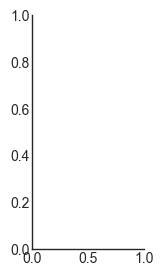

In [30]:
# Figure 3: Chrimson mice - Naive network base analysis

interestedCohort = 'Chrimson'
interestedTrainedLevel = 'Naive'

pfun.set_figure()
fig = plt.figure(constrained_layout=False, figsize=(16, 18)) # 8,11 for full A4 page

# set gridspec
gs_Summary          = fig.add_gridspec(ncols=3, nrows=1, bottom=0.41, top=0.58, left=0.05, right=0.55,
                              wspace=0.3, hspace=0.1)
gs_scatterPlots     = fig.add_gridspec(ncols=3, nrows=1, bottom=0.23, top=0.36, left=0.05, right=0.55, 
                              wspace=0.3, hspace=0.1)

gs_correlation      = fig.add_gridspec(ncols=2, nrows=1, bottom=0.05, top=0.18, left=0.05, right=0.44, 
                              wspace=0, hspace=0.1)
gs_correlationMean  = fig.add_gridspec(ncols=1, nrows=1, bottom=0.05, top=0.18, left=0.48, right=0.55, 
                              wspace=0.4, hspace=0.1)

plotParams = {
    'ylimitsforhist': [0, 1650],
    'xlimitsforhist': [-0.75, 0.75],
    'analysis_time': 1500,  # in ms
    'colorbarlimitsForHeatMap': [-1, 1],
    'scatterplotlimits': [-4.5, 4.5],
    'ylimitsforECDF': [0.5, 1.05],
    'xlimitsforABS': [-0.05, 1.2],
    'ylimitsforCV': [0.1, 0.15],
    'faceColors': ['black','red'],
     }



print( '\nCorrelation matrix for the Chrimson Naive population is calculating')
total_num_axis = gs_correlationMean.get_geometry()[0]* gs_correlationMean.get_geometry()[1]
ax_gs_correlationMean = {xx: fig.add_subplot(gs_correlationMean[xx]) for xx in range(total_num_axis)}
pfun.plot_correlationMatrix_meanChangeFOV( ['Naive'], cohort=interestedCohort, 
                       responsiveness=['All', 'None'], params = 'All',
                       axs=ax_gs_correlationMean[0], savefigname=None, savefigpath=None)


